<h1> Projeto 2 de Ciências de Dados </h1>

<h2> Grupo 20 </h2>
    <br>
    <h4> Integrantes: 
    <br>
    <br>
    <ul>
    <li> Venâncio Freitas </li>
    <br>
    <li> Welington Rodrigues </li>
    <br>
    <li> Henrique Puppi </li>
    <br>
    <li> Gabriel Fonseca </li>
    <br>
    </ul>
    </h4>

## 1. Visão Geral do Projeto 

### Objetivo 

 <p> O Trabalho em questão, envolverá a análise de uma base de dados na qual temos dados sociais sobre pessoas em situação de rua, a partir disso, iremos traçar o perfil envolvendo determinada situação de um desabrigado.</p>

### Motivações 

<p> Devido à crise global recente, motivada pela pandemia, o governo e a sociedade brasileira, passaram por dificuldades de manutenção da ordem nacional, principalmente em relação ao que tange o perfil socioeconômico. Assim, mostra-se relevante a análise do panorama desses moradores, para entender a situação de tais, como já citado. </p>

### Base de Dados 

<p> A base de dados que será analisada, trata-se de um Censo Realizado pela prefeitura de São Paulo no Ano de 2021, como já mencionado, e seu acesso é possível a partir do seguinte link: <a href='https://www.prefeitura.sp.gov.br/cidade/secretarias/assistencia_social/censo_2021/index.php?p=2007'> Censo 2021</a>
    
<h3> As features da base de dados são as seguintes: </h3>
<br>
<br>
<li> Situação de rua : Estado da Pessoa em relação à situação </li>
<li> Onde dormiu ontem: Local onde a pessoa dormiu no dia anterior ao dia de pesquisa </li> 
<li> Tempo de Permanencia: Tempo em que a pessoa passou nas ruas </li>
<li> Sexo: Sexo de nascença da pessoa </li> 
<li> Se identifica com o sexo de nascença:  Sexo ao qual a pessoa se identifica</li>
<li> Idade: Número da idade da pessoa </li> 
<li> Faixa de idade: Intervalo de 10 anos da idade da pessoa </li> 
<li> Classificação de idade: Classificação de idade da pessoa </li> 
<li> Cor_Raça_Etnia: Cor, raça, ou Etnia da pessoa </li> 
<li> Parentes no CA: Se a pessoa tem parentes em Centros de Acolhimento </li>
<li> Tempo na Situação: Tempo ao qual a pessoa encontra-se na situação ao qual ela está </li> 
<li> Tipo de Ponto: Tipo de local na rua ao qual ela encontra-se </li> 
<li> Presença_Moradia_Improvisada : Indica se a pessoa tem ou não moradia improvisada na sua situação </li> 
<li> Criança_acomp_adulto: Se tem criança acompanho de adulto entre o grupo consultado </li> 
<li> Criança_sozinha: Se tem uma criança sozinha na entrevista </li> 
<li> Latitude: Latitude da localidade ao qual a pessoa foi entrevistada </li> 
<li> Longitude: Longitude da pessoa entrevistada </li> 
<li> Data: Data ao qual foi feita a pesquisa </li> 
<li> Subprefeitura: Subprefeitura da cidade de São Paulo onde foi feita a entrevista </li> 
<li> Distrito: Divisão Administrativa do Município de São Paulo </li>

<br>
<br>

### Target 

O Target de Análise será a coluna 'Situação de rua', a qual, a partir das análises feitas pelo grupo, será feita a predicao de perfil, para definir se a pessoa está na Rua ou em Centros de Acolhimentos.

In [194]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
from math import*
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import folium.plugins 
from folium.plugins import HeatMap
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from folium.plugins import HeatMap
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import folium.plugins 
from folium.plugins import HeatMap
from sklearn import preprocessing

### 1. Limpeza da Base de Dados

#### Lendo a base de dados  e removendo a coluna ID

In [91]:
df = pd.read_excel('dados.xlsx')
df = pd.DataFrame(df)

# Como o target ID apenas contabiliza a pessoa, logo não é relevante para a análise.
df = df.drop('ID', axis=1) # Como o target ID apenas contabiliza a pessoa, logo não é relevante para a análise.
df = df.loc[(df.Subprefeitura != 'Sapopemba')].reset_index(drop=True) #Como, aqui, trabalharemos com 2 bases de dados, vamos utilizar
#subprefeituras comuns entre ambas 

#### Lendo a base de dados  socioeconômica

In [94]:
df_socio = pd.read_excel('socio.xlsx')

###### Utilizando Apenas os dados de 2010 na Planilha de indicadores Scioeconômicos

In [112]:
df_socio_2010 = df_socio[(df_socio.ANO == 2010)]

##### Manipulando as Variáveis na socioeconômica, para selecionarmos algumas variáveis de interesse

In [113]:
dict_replace = {
'Aricanduva / Vila Formosa': 'Aricanduva-Formosa-Carrão',
'Casa Verde': 'Casa Verde-Cachoeirinha',
'Freguesia do Ó / Brasilândia': 'Freguesia-Brasilândia',
'Jaçanã / Tremembé': 'Jaçanã-Tremembé',
'Pirituba / Jaraguá': 'Pirituba-Jaraguá',
'Santana / Tucuruvi': 'Santana-Tucuruvi',
'São Miguel Paulista': 'São Miguel',
'Vila Maria / Vila Guilherme': 'Vila Maria-Vila Guilherme',
}

df_socio_2010 = df_socio_2010.replace(dict_replace)

In [114]:
df_socio_usar = df_socio_2010.loc[:,['NOME_REG','IDHM','I_ESCOLARIDADE','I_FREQ_PROP','POP','PEA18M','T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP']]

#### Aqui, vamos Juntar os Índices Selecionados em 1 base de dados, para ser possível estudar as relações com o Target

In [115]:
colunas_usar = ['IDHM','I_ESCOLARIDADE','I_FREQ_PROP','POP','PEA18M','T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP']

In [116]:
for i in colunas_usar:
    df[str(i)] = 0

for i in range (31,62):
    for j in range(len(df)):
        if df.Subprefeitura[j] == df_socio_usar["NOME_REG"][i]:
            for c in colunas_usar:
                df[str(c)][j] = df_socio_usar[str(c)][i]


<h4> No target 'Onde dormiu ontem' iremos trocar a variável 'Neste centro de acolhida (aqui)' por 'CA' para facilitar a análise da base de dados. </h4>

In [95]:
df['Onde dormiu ontem'] = df['Onde dormiu ontem'].apply(lambda x: 'CA' if x == 'Neste centro de acolhida (aqui)' else x)

<h4> Lendo os Tipos de Variáveis e transformando as variáveis qualitativas em Categóricas </h4>

In [96]:
df.dtypes

Situação de rua                         object
Onde dormiu ontem                       object
Tempo de permanência                    object
Sexo                                    object
Identifica com o sexo nasceu            object
Idade                                   object
Faixa de idade                          object
Classificação de idade                  object
Cor_Raça_Etnia                          object
Parentes no CA                          object
Tempo na situação                       object
Tipo de ponto                           object
Presença_Moradia_Improvisada            object
Criança_acomp_Adulto                    object
Criança_Sozinha                         object
Latitude                               float64
Longitude                              float64
Data                            datetime64[ns]
Subprefeitura                           object
Distrito                                object
dtype: object

In [97]:
df.Subprefeitura = df.Subprefeitura.replace("M'boi Mirim", "M'Boi Mirim")

In [99]:
convert_dict = {'Situação de rua': 'category',
                'Onde dormiu ontem': 'category',
                'Tempo de permanência': 'category',
                'Sexo': 'category',
                'Identifica com o sexo nasceu': 'category',
                'Idade': 'category',
                'Faixa de idade': 'category',
                'Classificação de idade': 'category',
                'Cor_Raça_Etnia':'category',                          
                'Parentes no CA': 'category',                       
                'Tempo na situação': 'category',                   
                'Tipo de ponto': 'category',                        
                'Presença_Moradia_Improvisada': 'category',         
                'Criança_acomp_Adulto': 'category',                  
                'Criança_Sozinha': 'category',                      
                'Latitude': float,                           
                'Longitude': float,                             
                'Data': 'datetime64[ns]',                      
                'Subprefeitura': 'category',                          
                'Distrito': 'category'}

df = df.astype(convert_dict)
print(df.dtypes)

Situação de rua                       category
Onde dormiu ontem                     category
Tempo de permanência                  category
Sexo                                  category
Identifica com o sexo nasceu          category
Idade                                 category
Faixa de idade                        category
Classificação de idade                category
Cor_Raça_Etnia                        category
Parentes no CA                        category
Tempo na situação                     category
Tipo de ponto                         category
Presença_Moradia_Improvisada          category
Criança_acomp_Adulto                  category
Criança_Sozinha                       category
Latitude                               float64
Longitude                              float64
Data                            datetime64[ns]
Subprefeitura                         category
Distrito                              category
dtype: object


#### Transformando a Faixa de idade e a Classificação de Idade em variáveis qualitativas ordinais 

In [100]:
ordem_faixa = ['Até 11', '12 a 17', '18 a 30', '31 a 49', '50 a 59', '60 a 69', '70 a 79', '80 a 89', '90 a 99', 'Sem informação']
ordem_classificacao = ['Criança', 'Adolescente', 'Juventude', 'Adulto', 'Idoso', 'Sem classificação']


df['Faixa de idade'] = pd.Categorical(df['Faixa de idade'], categories=ordem_faixa, ordered=True)
df['Classificação de idade'] = pd.Categorical(df['Classificação de idade'], categories=ordem_classificacao, ordered=True)

### 2. Análise Exploratória

<p> Nesse momento do projeto, torna-se essencial estudar as variáveis e selecionar quais variáveis mais se relacionam com a variável target 'Situação de Rua' definida pelo grupo. </p>

### 2.1 Fazendo a Análise baseado nas variáveis referentes à idade 

In [101]:
#Identificação dos valores mais presentes no Dataframe Total 
df['Faixa de idade'].value_counts(sort = False , normalize=True ).to_frame()

,Faixa de idade
Até 11,0.011778
12 a 17,0.009454
18 a 30,0.128204
31 a 49,0.342085
50 a 59,0.117494
60 a 69,0.066018
70 a 79,0.014416
80 a 89,0.003078
90 a 99,0.000314
Sem informação,0.307161


Como observa-se a Grande quantidade de Pessoas sem informação, e esses dados não são conclusivos, foi estabelecido um filtro para monitoramos as faixas de idade as quais temos conhecimento no Dataframe.

In [102]:
filtro_info = df['Faixa de idade'] != 'Sem informação'
dados_idade_c_info = df.loc[filtro_info , :]
dados_idade_c_info['Faixa de idade'].value_counts(sort = False , normalize=True ).to_frame()

,Faixa de idade
Até 11,0.016999
12 a 17,0.013645
18 a 30,0.185041
31 a 49,0.493744
50 a 59,0.169583
60 a 69,0.095286
70 a 79,0.020807
80 a 89,0.004442
90 a 99,0.000453
Sem informação,0.000000


Removendo-se esses dados de pessoas em que a faixa de idade está sem informação, chegamos à conclusão de que a maior parte das pessoas da base de dados estão entre 31 a 49 anos.

### Nesse momento, vamos utilizar a ferramenta do crosstab, para, a partir das faixas de idade conhecidas, obsevarmos as relações com o target de interesse 

#### Análise do Crosstab com o Dataframe sem filtros 

In [103]:
#Corsstab Relativos em relação ao total 
pd.crosstab(df['Situação de rua'], df['Faixa de idade'], normalize=True  , margins=True )*100

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99,Sem informação,All
Situação de rua,,,,,,,,,,,
Acolhido,1.083543,0.323492,4.877513,15.097362,6.149497,4.544598,1.042714,0.248116,0.031407,6.394472,39.792714
Rua,0.094221,0.621859,7.942839,19.111181,5.599874,2.057161,0.398869,0.059673,0.000000,24.321608,60.207286
All,1.177764,0.945352,12.820352,34.208543,11.749372,6.601759,1.441583,0.307789,0.031407,30.716080,100.000000


In [104]:
#Porcentagem em relação às colunas 
pd.crosstab(df['Situação de rua'], df['Faixa de idade'], normalize='columns'  , margins=True )*100

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99,Sem informação,All
Situação de rua,,,,,,,,,,,
Acolhido,92.0,34.219269,38.045076,44.133309,52.338947,68.839201,72.331155,80.612245,100.0,20.817996,39.792714
Rua,8.0,65.780731,61.954924,55.866691,47.661053,31.160799,27.668845,19.387755,0.0,79.182004,60.207286


In [105]:
#Porcentagens em Relação às linhas 
pd.crosstab(df['Situação de rua'], df['Faixa de idade'], normalize='index'  , margins=True )*100

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99,Sem informação
Situação de rua,,,,,,,,,,
Acolhido,2.722968,0.812944,12.257301,37.940016,15.453828,11.420679,2.620363,0.623520,0.078927,16.069455
Rua,0.156495,1.032864,13.192488,31.742306,9.300991,3.416797,0.662493,0.099113,0.000000,40.396453
All,1.177764,0.945352,12.820352,34.208543,11.749372,6.601759,1.441583,0.307789,0.031407,30.716080


#### Análise do Crosstab com o Dataframe com filtros de idade  

In [106]:
#Dados com Porcentagens totais 
pd.crosstab(dados_idade_c_info['Situação de rua'], dados_idade_c_info['Faixa de idade'], normalize=True  , margins=True )*100

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99,All
Situação de rua,,,,,,,,,,
Acolhido,1.563917,0.466908,7.039891,21.790571,8.875793,6.559383,1.504986,0.358114,0.045331,48.204896
Rua,0.135993,0.897552,11.464189,27.583862,8.082502,2.969175,0.575703,0.086129,0.000000,51.795104
All,1.699909,1.364461,18.504080,49.374433,16.958296,9.528558,2.080689,0.444243,0.045331,100.000000


In [107]:
pd.crosstab(dados_idade_c_info['Situação de rua'], dados_idade_c_info['Faixa de idade'], normalize='index'  , margins=True )*100

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99
Situação de rua,,,,,,,,,
Acolhido,3.244311,0.968591,14.60410,45.204062,18.412639,13.607297,3.122061,0.742900,0.094038
Rua,0.262559,1.732890,22.13373,53.255733,15.604761,5.732540,1.111500,0.166287,0.000000
All,1.699909,1.364461,18.50408,49.374433,16.958296,9.528558,2.080689,0.444243,0.045331


A partir dessas relações estabelecidas, percebe-se uma informação importante: 
Grande parte das pessoas que estão 'Sem Informação' estão em situação de rua, e isso refuta a hipótese criada de que isso poderia ser inconclusivo. Na verdade, mostra uma realidade não pensada pelo grupo: Grande parte das pessoas que estão em situação de rua sequer sabem se identificar. 



#### Continuando a análise para a perspectiva de Idade, vamos analisar as distribuições de idade individual para as idades de ambos os grupos: Rua e Acolhidos 

In [108]:
#Aqui, precisamos converter as Variáveis 'Idade' em Variáveis Inteiras, para a montagem do histograma, é importante salientar que, 
#esse problema 
filtro_idade = df['Idade'] != 'Não respondeu'
df_hist = df.loc[filtro_idade , : ]
le = LabelEncoder()
df_hist['Idade'] = le.fit_transform(df_hist['Idade'])

In [109]:
#Estabelecendo Filtros para Printar 2 Histogramas : Idade de pessoas na rua e acolhidos 

filtro_rua = df_hist['Situação de rua'] == 'Rua'
filtro_acolhidos = df_hist['Situação de rua'] == 'Acolhido'

df_hist_rua = df_hist.loc[filtro_rua , :]
df_hist_acolhidos = df_hist.loc[filtro_acolhidos , :]

#### Analisando as medidas Resumo referente à idade

In [110]:
#Medidas reumo - Dataframe Total 
df_hist['Idade'].describe().to_frame()

,Idade
count,22060.000000
mean,41.913962
std,14.093872
min,0.000000
25%,32.000000
50%,41.000000
75%,51.000000
max,90.000000


In [52]:
#Medidas Resumo - Dataframe De rua 
df_hist_rua['Idade'].describe().to_frame()

,Idade
count,11445.000000
mean,39.976059
std,12.313720
min,0.000000
25%,31.000000
50%,39.000000
75%,48.000000
max,86.000000


In [53]:
#Medidas Resumo - Dataframe de Acolhidos 
df_hist_acolhidos['Idade'].describe().to_frame()

,Idade
count,10634.000000
mean,44.003291
std,15.518824
min,0.000000
25%,34.000000
50%,44.000000
75%,55.000000
max,90.000000


### Analisando Graficamente as medidas e Resumo 


Text(0, 0.5, 'Em anos ')

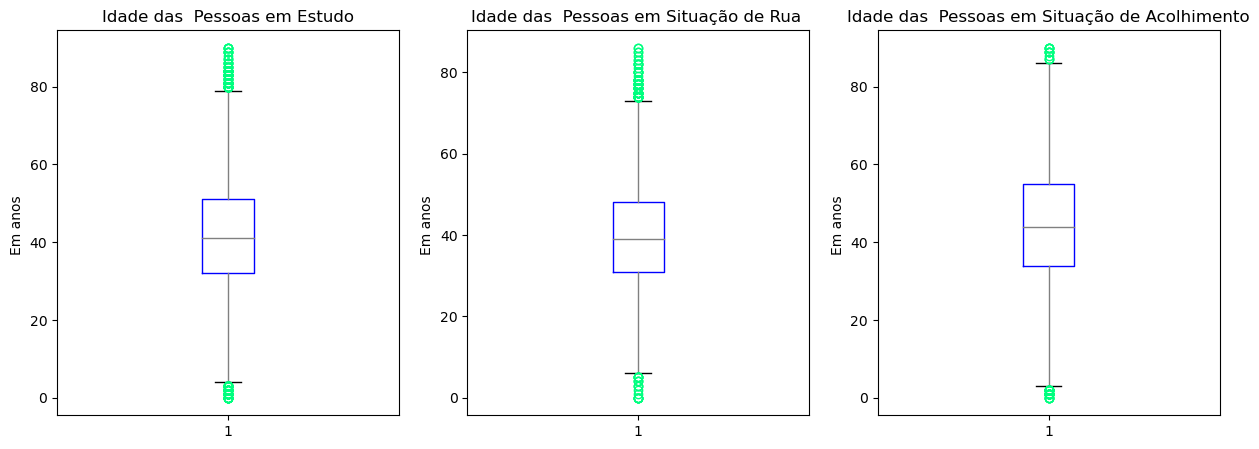

In [54]:
plt.figure(figsize = (15,5))

plt.subplot(131)

plt.boxplot(df_hist.Idade,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Idade das  Pessoas em Estudo')
plt.ylabel('Em anos ')

plt.subplot(132)
plt.boxplot(df_hist_rua.Idade,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Idade das  Pessoas em Situação de Rua ')
plt.ylabel('Em anos ')

plt.subplot(133)
plt.boxplot(df_hist_acolhidos.Idade,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Idade das  Pessoas em Situação de Acolhimento')
plt.ylabel('Em anos ')

#### Analisando a Distribuição das Idades pelo Gráfico de Histograma

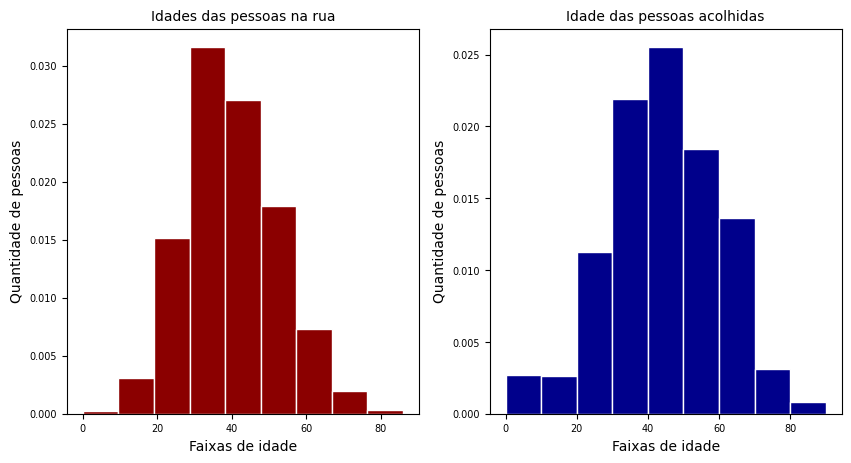

In [55]:
plt.figure(figsize=(10,5))

plt.subplot(121)

plt.hist(df_hist_rua['Idade'], edgecolor='white' , bins=len(ordem_faixa)-1 , color='darkred' , density = True)
plt.xlabel('Faixas de idade', fontsize=10)
plt.ylabel('Quantidade de pessoas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Idades das pessoas na rua', fontsize=10)

plt.subplot(122)

plt.hist(df_hist_acolhidos['Idade'], edgecolor='white' , bins=len(ordem_faixa)-1  , color='darkblue' , density=True )
plt.xlabel('Faixas de idade', fontsize=10)
plt.ylabel('Quantidade de pessoas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.title('Idade das pessoas acolhidas', fontsize=10)
plt.show()

### Encerrando a Análise Acerca das idades, vamos observar o parâmetro 'Classificação de Idade'

In [56]:
df['Classificação de idade'].value_counts().to_frame()

,Classificação de idade
Adulto,14645
Juventude,4086
Idoso,2672
Criança,375
Adolescente,301
Sem classificação,0


In [57]:
#Estabelecendo os filtros para separar os dataframes de rua e Acolhidos 
filtro_rua = df['Situação de rua'] == 'Rua'
filtro_acolhidos = df['Situação de rua'] == 'Acolhido'

df_rua = df.loc[filtro_rua , :]
df_acolhidos = df.loc[filtro_acolhidos , :]



### Estabelecendo as  tabelas de Crosstab

In [58]:
pd.crosstab(df['Situação de rua'], df['Classificação de idade'], normalize=True  , margins=True) * 100

Classificação de idade,Criança,Adolescente,Juventude,Adulto,Idoso,All
Situação de rua,,,,,,
Acolhido,1.562571,0.466507,7.033833,30.639975,8.460528,48.163413
Rua,0.135876,0.896780,11.472440,35.690022,3.641469,51.836587
All,1.698446,1.363286,18.506273,66.329997,12.101997,100.000000


In [59]:
pd.crosstab(df['Situação de rua'], df['Classificação de idade'], normalize='columns'  , margins=True) * 100

Classificação de idade,Criança,Adolescente,Juventude,Adulto,Idoso,All
Situação de rua,,,,,,
Acolhido,92.0,34.219269,38.007832,46.19324,69.91018,48.163413
Rua,8.0,65.780731,61.992168,53.80676,30.08982,51.836587


In [60]:
pd.crosstab(df['Situação de rua'], df['Classificação de idade'], normalize='index'  , margins=True) * 100

Classificação de idade,Criança,Adolescente,Juventude,Adulto,Idoso
Situação de rua,,,,,
Acolhido,3.244311,0.968591,14.604100,63.616701,17.566297
Rua,0.262123,1.730013,22.131935,68.851027,7.024902
All,1.698446,1.363286,18.506273,66.329997,12.101997


### 2.2 Realizando uma Análise pautada nas Formas de Identificação

#### 2.2.1Análise das Pessoas de acordo com a identificação pela Raça 

In [61]:
tabela_cruzada = pd.crosstab(df['Situação de rua'], df['Cor_Raça_Etnia'] , normalize ='index') #montagem da tabela cruzada
tabela_cruzada

Cor_Raça_Etnia,Amarela,Branca,Indígena,Não respondeu,Parda,Preta,Sem identificação
Situação de rua,,,,,,,
Acolhido,0.007968,0.248047,0.008442,0.007258,0.399448,0.184221,0.144615
Rua,0.004425,0.146494,0.004113,0.015774,0.302098,0.163621,0.363475


###### Analisando a quantidade de pessoas em situação de rua

In [62]:
df_situacao_rua = df.loc[(df['Situação de rua'] == 'Rua')] #filtro de pessoas em situação de rua
df_situacao_rua['Cor_Raça_Etnia'].value_counts(normalize = True ).to_frame()

,Cor_Raça_Etnia
Sem identificação,0.363475
Parda,0.302098
Preta,0.163621
Branca,0.146494
Não respondeu,0.015774
Amarela,0.004425
Indígena,0.004113


###### Analisando a quantidade de pessoas que estão em Centros de Acolhimento 

In [63]:
df_situacao_acolhimento = df.loc[(df['Situação de rua'] == 'Acolhido')] #filtro de pessoas que se encontram em abrigos
df_situacao_acolhimento['Cor_Raça_Etnia'].value_counts( normalize = True ).to_frame()

,Cor_Raça_Etnia
Parda,0.399448
Branca,0.248047
Preta,0.184221
Sem identificação,0.144615
Indígena,0.008442
Amarela,0.007968
Não respondeu,0.007258


###### Gráfico de pessoas em situação de rua e em acolhimento relacionadas à raça

Text(0.5, 1.0, 'Distribuição de raças das pessoas em situação de rua')

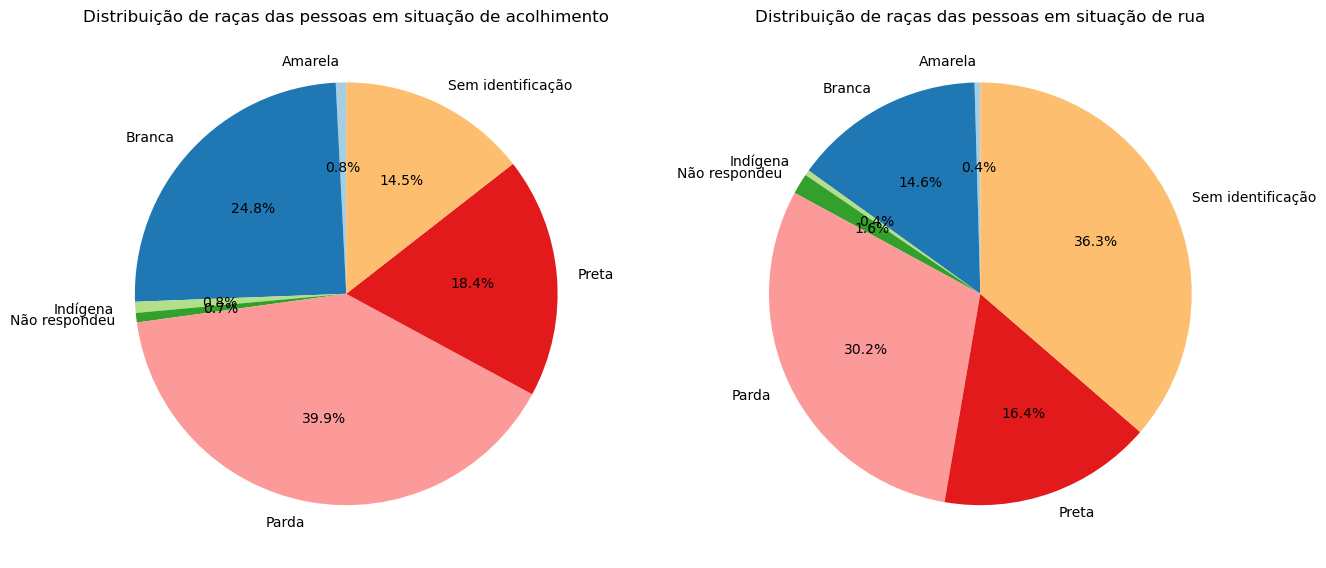

In [64]:
plt.figure(figsize=(15, 15))
plt.subplot(121)

#definindo as variaveis que serão utilizadas 
valores_acolhidos = tabela_cruzada.loc['Acolhido'].values
rotulos = tabela_cruzada.columns.tolist()

# Criando um gráfico de pizza
cores = plt.cm.Paired(range(len(rotulos)))  # Escolhendo cores com base no número de rótulos
plt.pie(valores_acolhidos, labels=rotulos, autopct='%1.1f%%', colors=cores, startangle=90)

# Adicionando um título
plt.title(f'Distribuição de raças das pessoas em situação de acolhimento')

# Criando um gráfico de pizza que relaciona a quantidade de moradores em situação de Acolhimento e raças
plt.subplot(122)

#definindo as variaveis que serão utilizadas 
valores_rua = tabela_cruzada.loc['Rua'].values

# Criando um gráfico de pizza
cores = plt.cm.Paired(range(len(rotulos)))  # Escolhendo cores com base no número de rótulos
plt.pie(valores_rua, labels=rotulos, autopct='%1.1f%%', colors=cores, startangle=90)

# Adicionando um título
plt.title(f'Distribuição de raças das pessoas em situação de rua')

#### Trabalhando com a mesma análise, mas em Dataframes sem o 'Não Respondeu'

In [65]:
filtro_n_respondeu = df['Cor_Raça_Etnia'] != 'Não respondeu'
df_plotagem = df.loc[filtro_n_respondeu , :]

tabela_cruzada = pd.crosstab(df_plotagem['Situação de rua'] , df_plotagem['Cor_Raça_Etnia'] , normalize='index')
tabela_cruzada


Cor_Raça_Etnia,Amarela,Branca,Indígena,Parda,Preta,Sem identificação
Situação de rua,,,,,,
Acolhido,0.008027,0.249861,0.008504,0.402368,0.185568,0.145673
Rua,0.004496,0.148842,0.004179,0.306940,0.166244,0.369301


Text(0.5, 1.0, 'Distribuição de raças das pessoas em situação de rua')

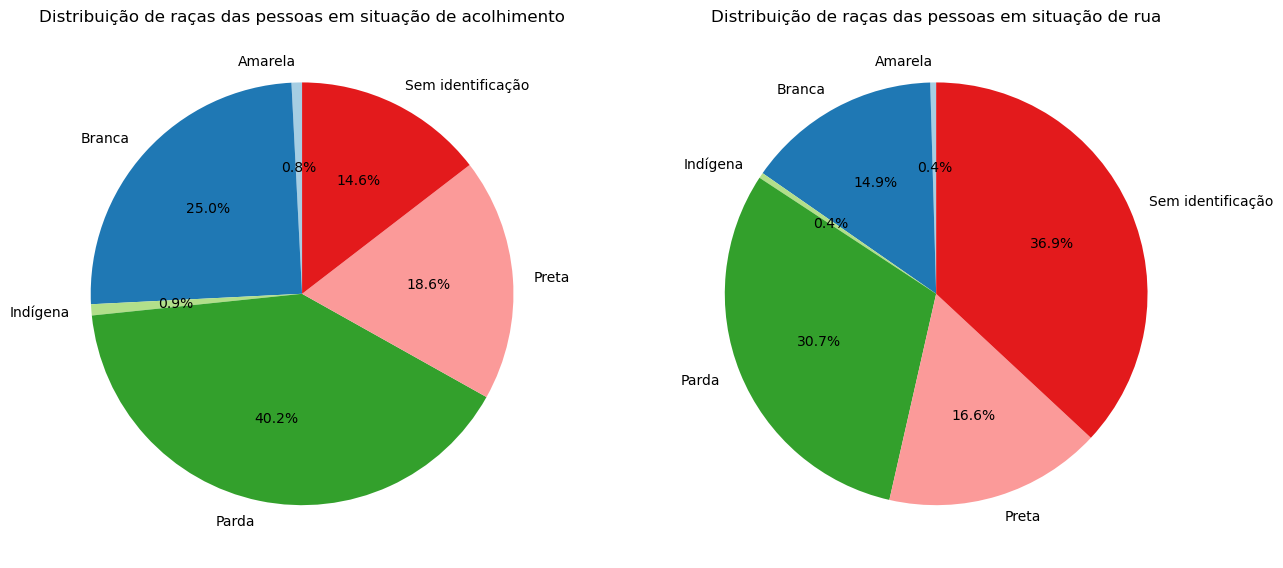

In [66]:
#Gráficos 
plt.figure(figsize=(15, 10))
plt.subplot(121)

#definindo as variaveis que serão utilizadas 
valores_acolhidos = tabela_cruzada.loc['Acolhido'].values
rotulos = tabela_cruzada.columns.tolist()

# Criando um gráfico de pizza
cores = plt.cm.Paired(range(len(rotulos)))  # Escolhendo cores com base no número de rótulos
plt.pie(valores_acolhidos, labels=rotulos, autopct='%1.1f%%', colors=cores, startangle=90)

# Adicionando um título
plt.title(f'Distribuição de raças das pessoas em situação de acolhimento')

# Criando um gráfico de pizza que relaciona a quantidade de moradores em situação de Acolhimento e raças
plt.subplot(122)

#definindo as variaveis que serão utilizadas 
valores_rua = tabela_cruzada.loc['Rua'].values

# Criando um gráfico de pizza
cores = plt.cm.Paired(range(len(rotulos)))  # Escolhendo cores com base no número de rótulos
plt.pie(valores_rua, labels=rotulos, autopct='%1.1f%%', colors=cores, startangle=90)

# Adicionando um título
plt.title(f'Distribuição de raças das pessoas em situação de rua')

#### 2.2.2 Análise Pautada no Gênero 

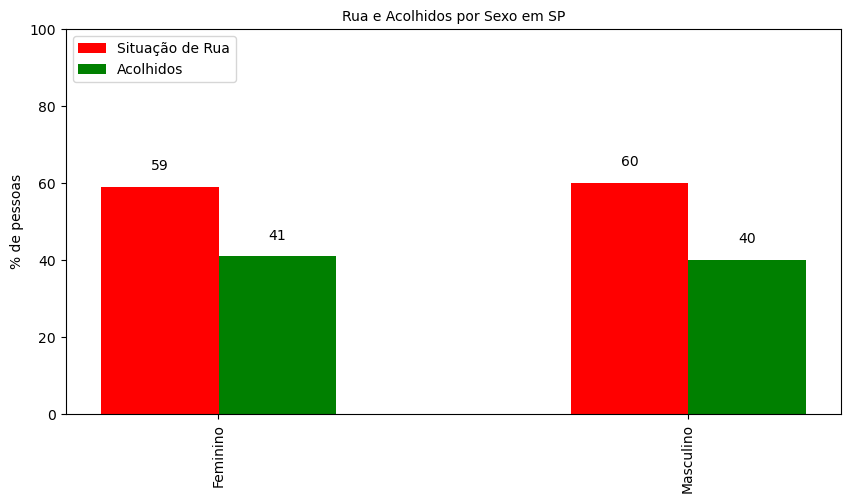

In [67]:
df_sexo = df.loc[(df.Sexo != 'Sem identificação')]
sexo_x_situacao = dict(pd.crosstab(df_sexo['Situação de rua'],df_sexo.Sexo, normalize='columns'))


acolhidos = []
rua = []

for i in sexo_x_situacao:
    acolhidos.append(round(sexo_x_situacao[i][0],2)*100)
    rua.append(round(sexo_x_situacao[i][1],2)*100)


subprefeituras = list(sexo_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(10,5))
c = 'red'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
    ax.bar_label(rects, padding=10, fontsize="10")
    multiplier += 1
    c = 'green'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Sexo em SP', fontsize="10")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="10", rotation=90)
ax.legend(loc='upper left', fontsize="10")
ax.set_ylim(0, 100)
plt.ylabel('% de pessoas', fontsize='10')

plt.show()

### 2.3. Análise Pautada na Geolocalização 

In [68]:
tabela_cruzada_loc = pd.crosstab(df['Situação de rua'], df["Distrito"]) #montagem da tabela cruzada
tabela_cruzada_loc

Distrito,Alto de Pinheiros,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,Brasilândia,Brás,Butantã,...,Vila Guilherme,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia,Água Rasa
Situação de rua,,,,,,,,,,,,,,,,,,,,,
Acolhido,0,225,0,0,121,502,638,0,553,45,...,547,2,152,223,28,25,0,190,1,303
Rua,3,68,139,201,355,256,613,64,653,26,...,213,47,292,205,247,41,50,77,6,76


In [69]:
#Criando lista de latitude e longitude dos distritos
lista_nomes_dist = []
lat = []
lon = []

for i in range(len(df.Distrito)):
    if df.Distrito[i] not in lista_nomes_dist:
        lista_nomes_dist.append(df.Distrito[i])
        lat.append(df.Latitude[i])
        lon.append(df.Longitude[i])

In [70]:
qnt_rua = list(tabela_cruzada_loc.loc['Rua'].values) #fazendo uma lista por meio da tabela cruzada da quantidade de pessoas em situação de rua

##### 2.3.1 Definindo uma função para colorir o marcador que ficará no mapa em função da quantidade de pessoas em situação de rua

In [71]:
map = folium.Map(location=[-23.550520, -46.633308], zoom_start=6, tiles='OpenStreetMap') # criando um mapa centrado em SP

In [72]:
def colour_marker(qnt_rua):
    if qnt_rua < 200:  #Menos de 200 pessoas em situação de rua
        return 'green'
    elif 200 <= qnt_rua < 500: #Menos de 500 pessoas em situação de rua e mais de 200
        return 'orange'
    else:
        return 'red'#Mais de 500 pessoas em situação de rua

##### 2.3.2 Definindo marcadores para as pessoas em situação de Rua

In [73]:
f = folium.FeatureGroup(name= "Rua" ) 

for lt, ln, qnt in zip(lat, lon, qnt_rua):
    f.add_child(folium.CircleMarker(location=[lt, ln], radius=6, popup=str(qnt)+" m",
    fill_color=colour_marker(qnt), color = 'grey', fill=True, fill_opacity=0.7))

In [74]:
map.add_child(f) 
map.add_child(folium.LayerControl())

#### 2.4. Análise Pautada nas Subprefeituras e nas suas Particularidades

In [87]:
#print(pd.Series(df.Subprefeitura.value_counts()))
o = 0
lista_subprefeituras = []
for i  in df.Subprefeitura.values:
    if i not in lista_subprefeituras: 
        lista_subprefeituras.append(i)

In [88]:
sub_x_situacao = pd.crosstab(df['Situação de rua'],df.Subprefeitura, normalize='columns')
acolhidos = []
rua = []

for i in sub_x_situacao:
    acolhidos.append(round(sub_x_situacao[i][0],2)*100)
    rua.append(round(sub_x_situacao[i][1],2)*100)


In [77]:
subprefeituras = list(sub_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(140,60))
c = 'red'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
    ax.bar_label(rects, padding=10, fontsize="40")
    multiplier += 1
    c = 'green'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Subprefeituras SP (% por subprefeitura)', fontsize="100")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="60", rotation=90)
ax.legend(loc='upper left', fontsize="50")
ax.set_ylim(0, 100)

plt.show()

### 2.5Análise Baseada no tempo na situação 

In [78]:
df_rua = df.loc[filtro_rua , :]
df_ac = df.loc[filtro_acolhidos , :]


In [79]:
df['Tempo na situação'].value_counts(normalize = True ).to_frame()

,Tempo na situação
NR/NS,0.280391
Mais de 2 anos até 5 anos,0.206875
Mais de 5 anos até 10 anos,0.186677
Mais de 10 anos,0.125110
Mais de 1 ano até 2 anos,0.067087
Mais de 1 mês até 6 meses,0.058305
Mais de 6 meses até 1 ano,0.046481
Entre 1 semana e 1 mês,0.018724
Até 1 semana,0.010350


In [80]:
df_rua['Tempo na situação'].value_counts(normalize=True).to_frame()

,Tempo na situação
NR/NS,0.405487
Mais de 2 anos até 5 anos,0.133115
Mais de 5 anos até 10 anos,0.126816
Mais de 10 anos,0.122859
Mais de 1 ano até 2 anos,0.077672
Mais de 1 mês até 6 meses,0.054922
Mais de 6 meses até 1 ano,0.049977
Entre 1 semana e 1 mês,0.017960
Até 1 semana,0.011193


In [81]:
df_ac['Tempo na situação'].value_counts(normalize=True).to_frame()

,Tempo na situação
Mais de 2 anos até 5 anos,0.318659
Mais de 5 anos até 10 anos,0.277396
Mais de 10 anos,0.128521
NR/NS,0.090809
Mais de 1 mês até 6 meses,0.063432
Mais de 1 ano até 2 anos,0.051045
Mais de 6 meses até 1 ano,0.041183
Entre 1 semana e 1 mês,0.019882
Até 1 semana,0.009073


### Construção da Visualização do Comparativo 

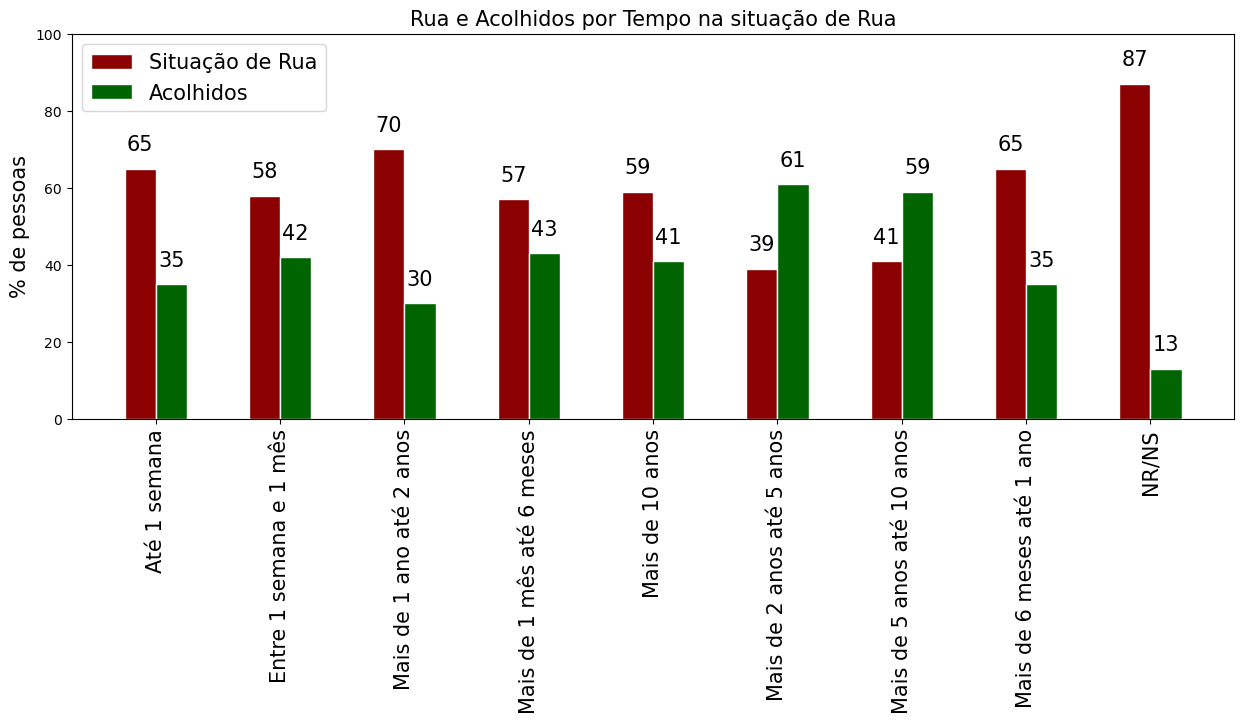

In [82]:
tempo_x_situacao = dict(pd.crosstab(df['Situação de rua'],df['Tempo na situação'], normalize='columns'))


acolhidos = []
rua = []

for i in tempo_x_situacao:
    acolhidos.append(round(tempo_x_situacao[i][0],2)*100)
    rua.append(round(tempo_x_situacao[i][1],2)*100)


subprefeituras = list(tempo_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(15,5))
c = 'darkred'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c , edgecolor='white')
    ax.bar_label(rects, padding=10, fontsize="15")
    multiplier += 1
    c = 'darkgreen'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Tempo na situação de Rua', fontsize="15")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="15", rotation=90)
ax.legend(loc='upper left', fontsize="15")
ax.set_ylim(0, 100)
plt.ylabel('% de pessoas', fontsize='15')

plt.show()

### 2.6. Análise Baseada em Parentes no Centro de Acolhimento 

##### Identificação das variáveis na series 

In [83]:
filtro_CA = df['Parentes no CA'] != 'Não informado'
df_CA = df.loc[filtro_CA , :]
df_CA['Parentes no CA'].value_counts(normalize=True).to_frame()

,Parentes no CA
Não,0.571502
Sim,0.428498
Não informado,0.000000


In [84]:
df_ac = df_ac.loc[filtro_CA , :]
df_ac['Parentes no CA'].value_counts(normalize = True).to_frame()

,Parentes no CA
Não,0.640474
Sim,0.359526
Não informado,0.000000


In [85]:
df_rua = df_rua.loc[filtro_CA , :]
df_rua['Parentes no CA'].value_counts(normalize = True).to_frame()

,Parentes no CA
Não,0.50472
Sim,0.49528
Não informado,0.00000


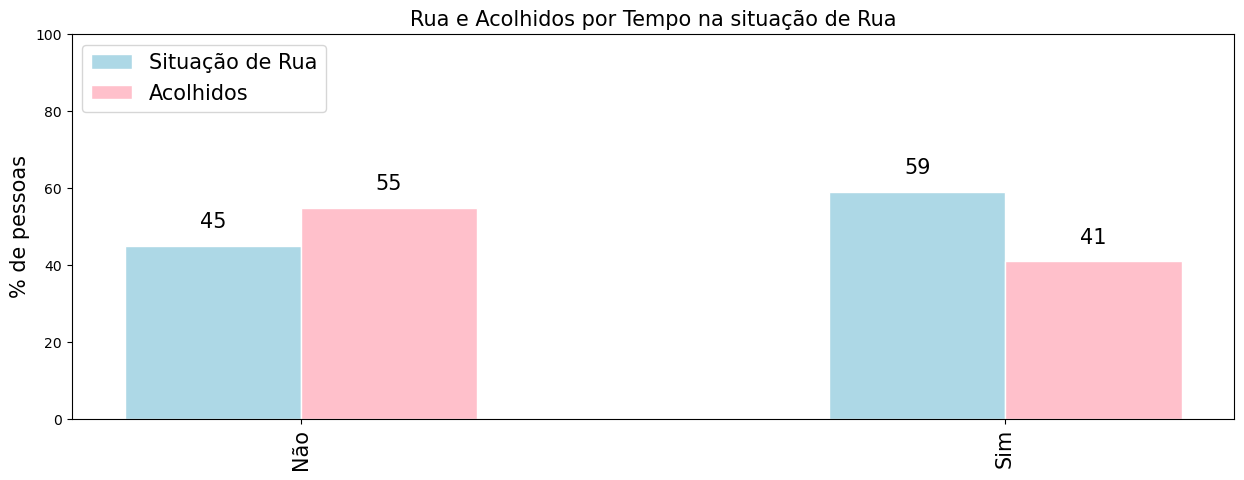

In [86]:
parentes_x_situacao = dict(pd.crosstab(df_CA['Situação de rua'],df['Parentes no CA'], normalize='columns'))


acolhidos = []
rua = []

for i in parentes_x_situacao:
    acolhidos.append(round(parentes_x_situacao[i][0],2)*100)
    rua.append(round(parentes_x_situacao[i][1],2)*100)


subprefeituras = list(parentes_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(15,5))
c = 'lightblue'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c , edgecolor='white')
    ax.bar_label(rects, padding=10, fontsize="15")
    multiplier += 1
    c = 'pink'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Tempo na situação de Rua', fontsize="15")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="15", rotation=90)
ax.legend(loc='upper left', fontsize="15")
ax.set_ylim(0, 100)
plt.ylabel('% de pessoas', fontsize='15')

plt.show()

### 3 Análises Quantitativas

In [118]:
df_quants = df.iloc[: , 20: ]
df_quants.columns

Index(['IDHM', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'POP', 'PEA18M',
       'T_FUNDIN_TODOS_MMEIO', 'AGUA_ESGOTO', 'RENOCUP', 'RDPC', 'PPOB',
       'GINI', 'RAZDEP'],
      dtype='object')

#### Separando em Acolhidos e em Situação de Rua

In [121]:
filtro_rua = df['Situação de rua'] == 'Rua'
filtro_acolhidos = df['Situação de rua'] == 'Acolhido'

In [122]:
df_quants_rua = df.loc[filtro_rua , : ]
df_quants_acolhidos = df.loc[filtro_acolhidos , :]

##### Analise da PEA18M

In [124]:
# analisando em situação de rua

df_quants_rua.PEA18M.describe()

count     19170.000000
mean     221757.964319
std       50306.155447
min       61672.000000
25%      180006.000000
50%      261108.000000
75%      261564.000000
max      308735.000000
Name: PEA18M, dtype: float64

In [125]:
#analisando acolhidos
df_quants_acolhidos.PEA18M.describe()

count     12670.000000
mean     210029.665114
std       48303.298099
min       61672.000000
25%      180006.000000
50%      189013.000000
75%      261564.000000
max      308735.000000
Name: PEA18M, dtype: float64

##### Gráfico que mostra a quantidade de pessoas econômicamente ativas dentro dos distritos com relatos em pessoas em situação de rua e ativos

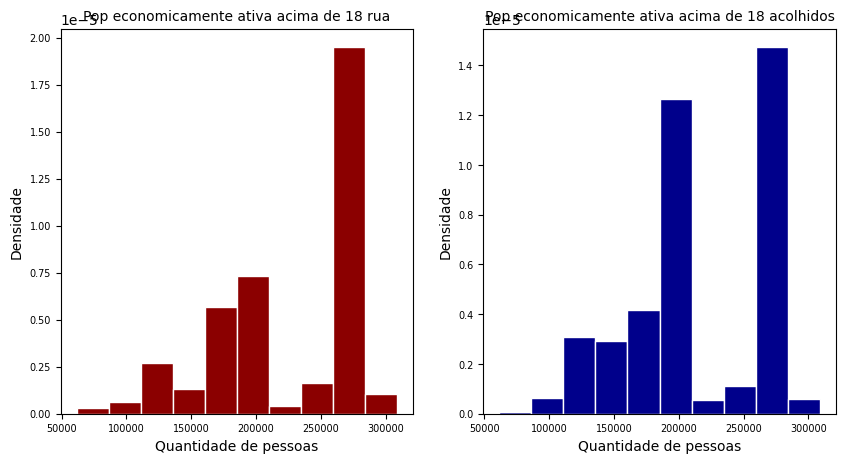

In [126]:
plt.figure(figsize=(10,5))

plt.subplot(121)

plt.hist(df_quants_rua.PEA18M, edgecolor='white' , bins = 10, color='darkred' , density = True)
plt.xlabel('Quantidade de pessoas', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Pop economicamente ativa acima de 18 rua', fontsize=10)

plt.subplot(122)

plt.hist(df_quants_acolhidos.PEA18M, edgecolor='white' , bins = 10, color='darkblue' , density=True )
plt.xlabel('Quantidade de pessoas', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.title('Pop economicamente ativa acima de 18 acolhidos', fontsize=10)
plt.show()

Text(0, 0.5, 'Qnt')

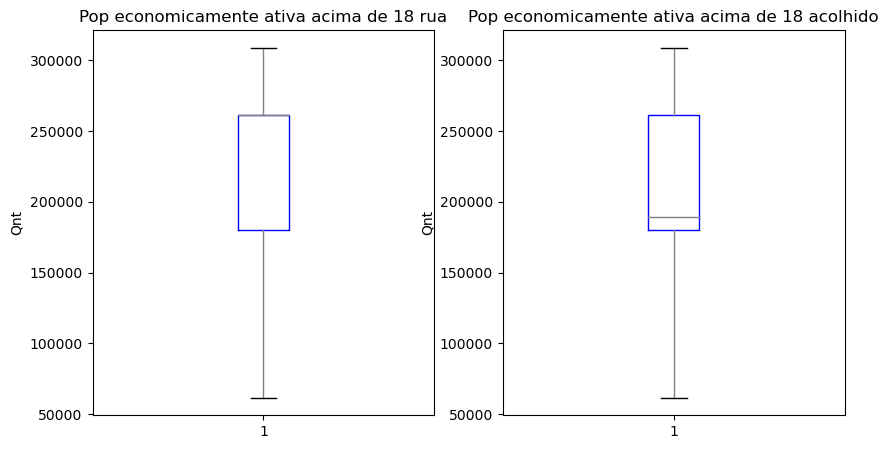

In [128]:
plt.figure(figsize = (15,5))

plt.subplot(131)

plt.boxplot(df_quants_rua.PEA18M,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Pop economicamente ativa acima de 18 rua')
plt.ylabel('Qnt')

plt.subplot(132)

plt.boxplot(df_quants_acolhidos.PEA18M,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Pop economicamente ativa acima de 18 acolhido')
plt.ylabel('Qnt')

##### Analise de T_FUNDIN_TODOS_MMEIO (Moradias vuneráveis a pobreza)

In [129]:
df_quants_rua.T_FUNDIN_TODOS_MMEIO.describe()

count    19170.000000
mean         1.914985
std          1.872252
min          0.110000
25%          0.990000
50%          0.990000
75%          1.710000
max          9.920000
Name: T_FUNDIN_TODOS_MMEIO, dtype: float64

In [130]:
df_quants_acolhidos.T_FUNDIN_TODOS_MMEIO.describe()

count    12670.000000
mean         1.876209
std          1.671503
min          0.110000
25%          0.990000
50%          1.160000
75%          1.710000
max          9.920000
Name: T_FUNDIN_TODOS_MMEIO, dtype: float64

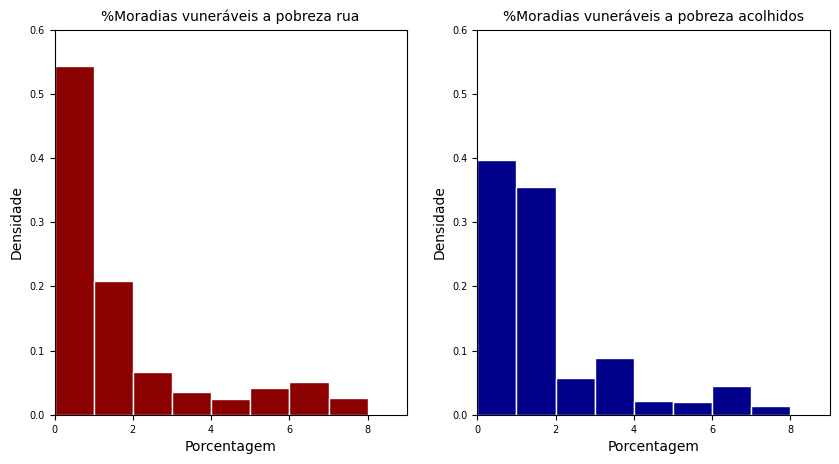

In [143]:
plt.figure(figsize=(10,5))
faixas = np.arange(0,14,1)
plt.subplot(121)

plt.hist(df_quants_rua.T_FUNDIN_TODOS_MMEIO, bins=faixas, edgecolor='white', color='darkred' , density = True)
plt.xlabel('Porcentagem', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('%Moradias vuneráveis a pobreza rua', fontsize=10)
plt.ylim(0,0.6)
plt.xlim( 0 , 9)
plt.subplot(122)

plt.hist(df_quants_acolhidos.T_FUNDIN_TODOS_MMEIO, bins=faixas, edgecolor='white', color='darkblue' , density=True )
plt.xlabel('Porcentagem', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0,0.6)
plt.xlim( 0 , 9)
plt.title('%Moradias vuneráveis a pobreza acolhidos', fontsize=10)
plt.show()

Text(0, 0.5, 'Porcentagem')

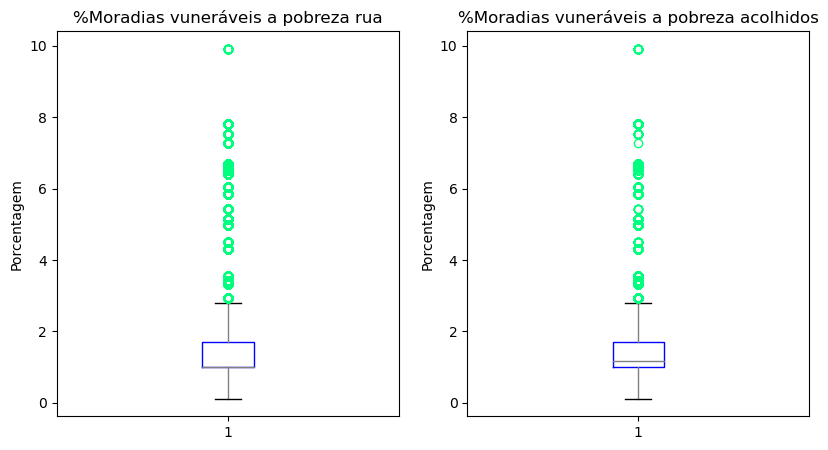

In [133]:
plt.figure(figsize = (15,5))

plt.subplot(131)

plt.boxplot(df_quants_rua.T_FUNDIN_TODOS_MMEIO,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('%Moradias vuneráveis a pobreza rua')
plt.ylabel('Porcentagem')

plt.subplot(132)

plt.boxplot(df_quants_acolhidos.T_FUNDIN_TODOS_MMEIO,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('%Moradias vuneráveis a pobreza acolhidos')
plt.ylabel('Porcentagem')

##### Analise de AGUA_ESGOTO

In [135]:
df_quants_rua.AGUA_ESGOTO.describe()

count    19170.000000
mean         0.211638
std          0.265011
min          0.000000
25%          0.050000
50%          0.210000
75%          0.210000
max          5.410000
Name: AGUA_ESGOTO, dtype: float64

In [136]:
df_quants_acolhidos.AGUA_ESGOTO.describe()

count    12670.000000
mean         0.191395
std          0.285295
min          0.000000
25%          0.050000
50%          0.170000
75%          0.210000
max          5.410000
Name: AGUA_ESGOTO, dtype: float64

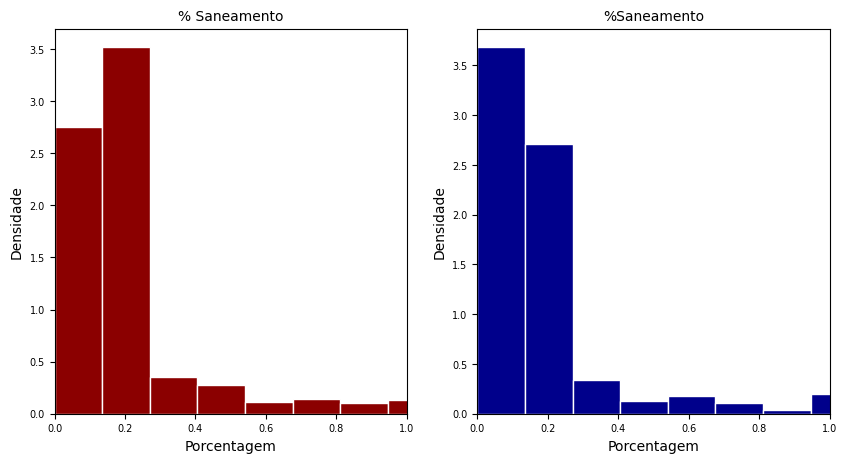

In [144]:
plt.figure(figsize=(10,5))

plt.subplot(121)

plt.hist(df_quants_rua.AGUA_ESGOTO, edgecolor='white', color='darkred' , bins = 40, density = True)
plt.xlabel('Porcentagem', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('% Saneamento', fontsize=10)
plt.xlim(0, 1)

plt.subplot(122)

plt.hist(df_quants_acolhidos.AGUA_ESGOTO, edgecolor='white', color='darkblue' , bins = 40, density=True )
plt.xlabel('Porcentagem', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim(0, 1)

plt.title('%Saneamento', fontsize=10)
plt.show()

Text(0, 0.5, 'Porcentagem')

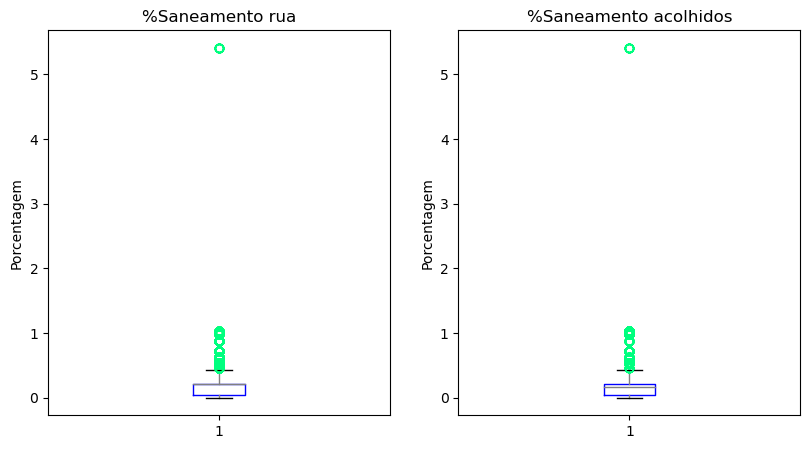

In [138]:
plt.figure(figsize = (15,5))

plt.subplot(131)

plt.boxplot(df_quants_rua.AGUA_ESGOTO,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('%Saneamento rua')
plt.ylabel('Porcentagem')

plt.subplot(132)

plt.boxplot(df_quants_acolhidos.AGUA_ESGOTO,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('%Saneamento acolhidos')
plt.ylabel('Porcentagem')

##### Analise de RENOCUP (Rendimento médio da população)

In [139]:
df_quants_rua.RENOCUP.describe()

count    19170.000000
mean      3177.662252
std       1249.008218
min        887.170000
25%       2250.230000
50%       3513.450000
75%       3513.450000
max       6928.600000
Name: RENOCUP, dtype: float64

In [140]:
df_quants_acolhidos.RENOCUP.describe()

count    12670.000000
mean      2979.124097
std       1040.331629
min        887.170000
25%       2250.230000
50%       3017.220000
75%       3513.450000
max       6928.600000
Name: RENOCUP, dtype: float64

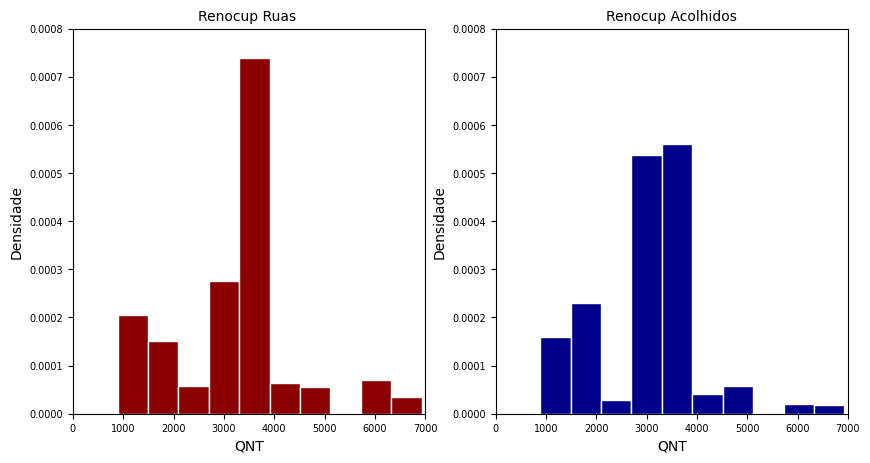

In [146]:
plt.figure(figsize=(10,5))

plt.subplot(121)

plt.hist(df_quants_rua.RENOCUP, edgecolor='white', color='darkred' , density = True)
plt.xlabel('QNT', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Renocup Ruas ', fontsize=10)
plt.xlim(0 , 7000)
plt.ylim( 0 , 8e-4)
plt.subplot(122)

plt.hist(df_quants_acolhidos.RENOCUP, edgecolor='white', color='darkblue' , density=True )
plt.xlabel('QNT', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim(0 , 7000)
plt.ylim( 0 , 8e-4)
plt.title('Renocup Acolhidos', fontsize=10)
plt.show()

Text(0, 0.5, 'QNT')

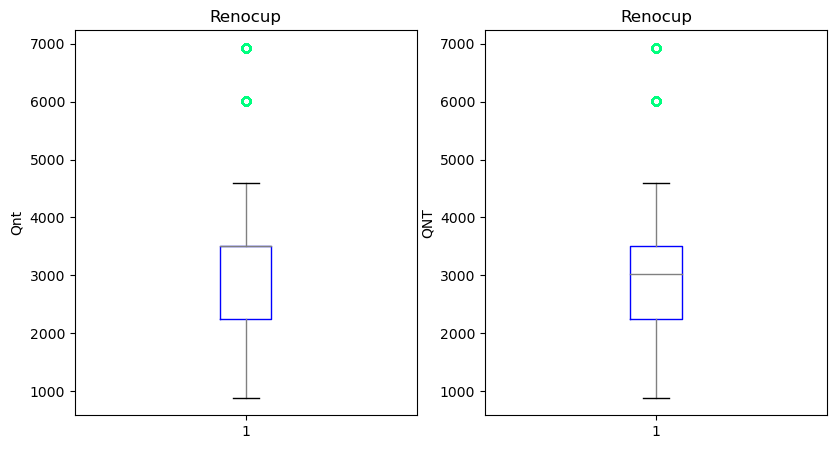

In [147]:
plt.figure(figsize = (15,5))

plt.subplot(131)

plt.boxplot(df_quants_rua.RENOCUP, 
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Renocup')
plt.ylabel('Qnt')

plt.subplot(132)

plt.boxplot(df_quants_acolhidos.RENOCUP,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Renocup')
plt.ylabel('QNT')

##### Análise IDH

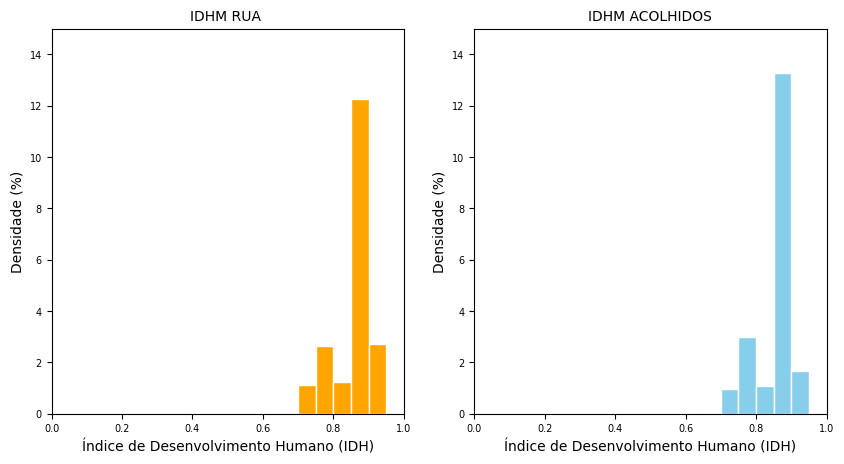

In [148]:
faixas = np.arange(0 , 1 , 0.05)
plt.figure(figsize=(10,5))
plt.subplot(121)

plt.hist(df_quants_rua.IDHM, edgecolor='white' , bins = faixas ,color='orange' , density = True )
plt.xlabel('Índice de Desenvolvimento Humano (IDH)', fontsize=10)
plt.ylabel('Densidade (%)', fontsize=10)
plt.xticks(fontsize=7)
plt.xlim( 0 , 1)
plt.ylim( 0 , 15)
plt.yticks(fontsize=7)
plt.title('IDHM RUA ', fontsize=10)

plt.subplot(122)

plt.hist(df_quants_acolhidos.IDHM, edgecolor='white' , bins = faixas ,  color='skyblue' , density = True)
plt.xlabel('Índice de Desenvolvimento Humano (IDH)', fontsize=10)
plt.ylabel('Densidade (%)', fontsize=10)
plt.ylim( 0 , 15)
plt.xlim( 0 , 1)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.title('IDHM ACOLHIDOS', fontsize=10)
plt.show()

### Conclusão Acerca desse Target 

<p> Aqui, percebe-se que: Para Valores de IDH maiores que 0.8%, há uma tendência maior de números de acolhimento. Porém, para valores menores que 0.8%, registrados nessa base de dados, há uma tensdência ligeiramente maior de maior presença de moradores de rua em relação aos acolhimentos. Assim, a anáise do IDH pode ter uma relevância na análise. </p>

### Análise dos Índices de Escolaridade ( I_ESCOLARIDADE) 

#### Frequência desse Índice para cada um dos DataFrames

In [150]:
# Frequência para os municípios com registros de moradores de rua
df_quants_rua.I_ESCOLARIDADE.value_counts( normalize = True ).to_frame()

,I_ESCOLARIDADE
0.818,0.446844
0.762,0.117580
0.784,0.043088
0.899,0.042306
0.827,0.039071
0.829,0.033490
0.659,0.024413
0.703,0.023213
0.637,0.022170
0.898,0.021440


In [151]:
# Frequência para os municípios com registros de moradores acolhidos
df_quants_acolhidos.I_ESCOLARIDADE.value_counts( normalize = True ).to_frame()

,I_ESCOLARIDADE
0.818,0.338200
0.762,0.280742
0.659,0.060773
0.829,0.035359
0.784,0.032044
0.827,0.024704
0.695,0.019416
0.591,0.019179
0.704,0.018074
0.678,0.015470


In [152]:
df_quants_rua.I_ESCOLARIDADE.describe().to_frame()

,I_ESCOLARIDADE
count,19170.000000
mean,0.770530
std,0.084954
min,0.498000
25%,0.704000
50%,0.818000
75%,0.818000
max,0.899000


In [153]:
df_quants_acolhidos.I_ESCOLARIDADE.describe().to_frame()

,I_ESCOLARIDADE
count,12670.000000
mean,0.758497
std,0.076363
min,0.498000
25%,0.704000
50%,0.762000
75%,0.818000
max,0.899000


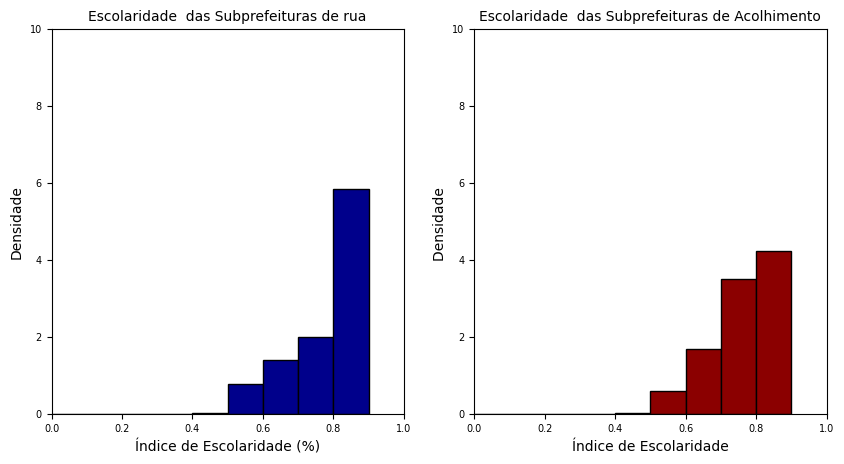

In [154]:
plt.figure(figsize=(10,5))

faixas = np.arange( 0 , 1 , 0.1)

plt.subplot(121)

plt.hist(df_quants_rua.I_ESCOLARIDADE, edgecolor='black' ,  color='darkblue' , bins = faixas , density = True )
plt.xlabel('Índice de Escolaridade (%)', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Escolaridade  das Subprefeituras de rua', fontsize=10)
plt.xlim( 0 , 1)
plt.ylim( 0 , 10 )
plt.subplot(122)

plt.hist(df_quants_acolhidos.I_ESCOLARIDADE, edgecolor='black' ,  color='darkred' , bins = faixas ,  density = True )
plt.xlabel('Índice de Escolaridade', fontsize=10)
plt.ylabel('Densidade ', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim( 0 , 1)
plt.ylim( 0 , 10 )
plt.title('Escolaridade  das Subprefeituras de Acolhimento', fontsize=10)
plt.show()

### Conclusões 

<p> Para Índices de Escolaridade Superiores a 0.8%, temos que há uma tendência maior para índices de acolhimento. Porém, para índices menores que 0.8%, há uma maior tendência dessas pessoas estarem em situação de rua. </p>

#### Índice de Frequência Populacional (I_FREQ_PROP)

###### Frequência de valores em cada dataframe

In [157]:
df_quants_rua.I_FREQ_PROP.value_counts( normalize = True ).to_frame()

,I_FREQ_PROP
0.799,0.446844
0.815,0.117580
0.824,0.043088
0.868,0.042306
0.826,0.039071
0.818,0.033490
0.749,0.024413
0.775,0.023213
0.748,0.022170
0.879,0.021440


In [158]:
df_quants_acolhidos.I_FREQ_PROP.value_counts( normalize = True ).to_frame()

,I_FREQ_PROP
0.799,0.338200
0.815,0.280742
0.749,0.060773
0.818,0.035359
0.824,0.032044
0.826,0.024704
0.741,0.019653
0.779,0.019416
0.781,0.018074
0.757,0.015470


##### Medidas  - Resumo para cada Dataframe

In [159]:
df_quants_acolhidos.I_FREQ_PROP.describe().to_frame()

,I_FREQ_PROP
count,12670.000000
mean,0.794163
std,0.031870
min,0.675000
25%,0.781000
50%,0.799000
75%,0.815000
max,0.879000


In [160]:
df_quants_rua.I_FREQ_PROP.describe().to_frame()

,I_FREQ_PROP
count,19170.00000
mean,0.79414
std,0.03685
min,0.67500
25%,0.78300
50%,0.79900
75%,0.81500
max,0.87900


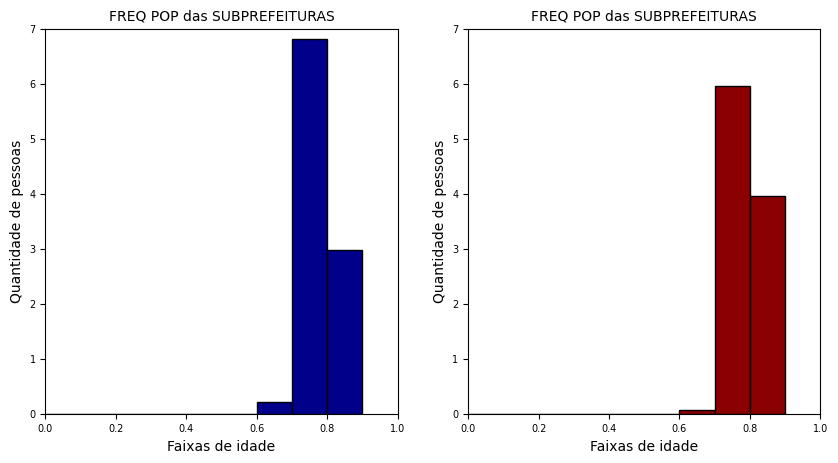

In [161]:
plt.figure(figsize=(10,5))

plt.subplot(121)

plt.hist(df_quants_rua.I_FREQ_PROP, edgecolor='black' , bins = faixas ,   color='darkblue' , density = True )
plt.xlabel('Faixas de idade', fontsize=10)
plt.ylabel('Quantidade de pessoas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim(0 , 1 )
plt.ylim( 0 , 7)
plt.title('FREQ POP das SUBPREFEITURAS', fontsize=10)

plt.subplot(122)

plt.hist(df_quants_acolhidos.I_FREQ_PROP, edgecolor='black' , bins = faixas ,   color='darkred' , density = True)
plt.xlabel('Faixas de idade', fontsize=10)
plt.ylabel('Quantidade de pessoas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim(0 , 1 )
plt.ylim( 0 , 7)
plt.title('FREQ POP das SUBPREFEITURAS', fontsize=10)
plt.show()

### Conclusões 

<p> Para valores desse Índice menores que 0.8, percebe-se uma presença maior de Acolhidos. Porém, para Valores inferiores a 0.8, há uma presença maior de pessoas em situação de rua. </p>

##### POPULAÇÂO TOTAL QUE RESIDE EM MUNICÌPIOS PARTICULARES PERMANENTES (POP)

In [163]:
df_quants_rua.POP.value_counts( normalize = True ).to_frame()

,POP
421638,0.446844
338675,0.117580
320510,0.043088
342655,0.042306
302017,0.039071
236803,0.033490
296356,0.024413
462728,0.023213
523084,0.022170
288101,0.021440


In [164]:
df_quants_acolhidos.POP.value_counts( normalize = True ).to_frame()

,POP
421638,0.338200
338675,0.280742
296356,0.060773
236803,0.035359
320510,0.032044
302017,0.024704
473872,0.019416
369127,0.019179
266983,0.018074
308844,0.015470


In [165]:
df_quants_rua.POP.describe().to_frame()

,POP
count,19170.000000
mean,383014.796505
std,80166.955191
min,139045.000000
25%,338675.000000
50%,421638.000000
75%,421638.000000
max,606601.000000


In [166]:
df_quants_acolhidos.POP.describe().to_frame()

,POP
count,12670.000000
mean,367663.586109
std,73425.426964
min,139045.000000
25%,338675.000000
50%,338675.000000
75%,421638.000000
max,606601.000000


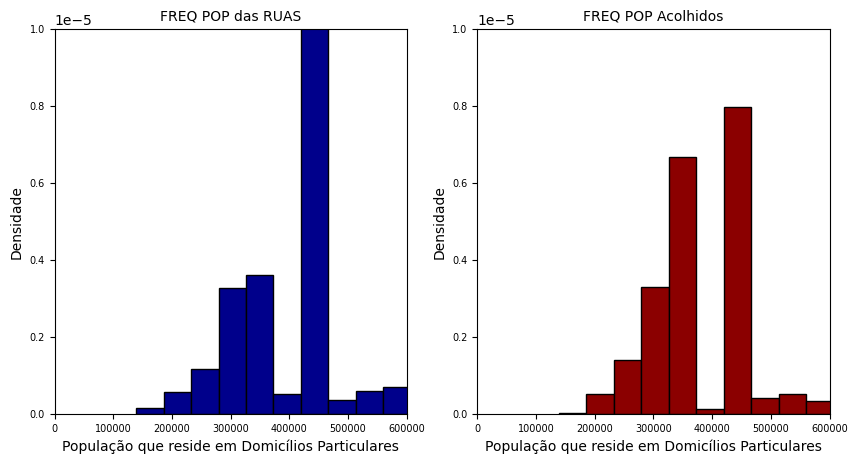

In [167]:

plt.figure(figsize=(10,5))

plt.subplot(121)

plt.hist(df_quants_rua.POP, edgecolor='black' , bins = 10 ,   color='darkblue' , density = True )
plt.xlabel('População que reside em Domicílios Particulares', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim( 0 , 0.00001)
plt.xlim( 0 , 600000)
plt.title('FREQ POP das RUAS', fontsize=10)

plt.subplot(122)

plt.hist(df_quants_acolhidos.POP, edgecolor='black' ,bins = 10 ,   color='darkred' , density = True)
plt.xlabel('População que reside em Domicílios Particulares', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim( 0 , 0.00001)
plt.xlim( 0 , 600000)
plt.title('FREQ POP Acolhidos', fontsize=10)
plt.show()

#### Conclusões 

<p> Para A Faixa de valores próximos a 40 mil pessoas, há uma tendência maior de número de pessoas em situação de rua. Porém, para valores superiores a essa faixa, temos uma clara tendência de adesão à acolhimento

#### Análise da Renda Per Capita (RDPC)

In [169]:
df_quants_rua['RDPC'].value_counts(normalize=True).to_frame()

,RDPC
2894.76,0.446844
2262.48,0.117580
2134.88,0.043088
5065.00,0.042306
3468.59,0.039071
3688.01,0.033490
1072.66,0.024413
1482.28,0.023213
784.72,0.022170
6125.59,0.021440


In [170]:
df_quants_rua['RDPC'].value_counts(normalize=True).to_frame()

,RDPC
2894.76,0.446844
2262.48,0.117580
2134.88,0.043088
5065.00,0.042306
3468.59,0.039071
3688.01,0.033490
1072.66,0.024413
1482.28,0.023213
784.72,0.022170
6125.59,0.021440


In [171]:
df_quants_rua['RDPC'].describe().to_frame()

,RDPC
count,19170.000000
mean,2516.131329
std,1152.643638
min,499.680000
25%,1539.140000
50%,2894.760000
75%,2894.760000
max,6125.590000


In [172]:
df_quants_acolhidos['RDPC'].describe().to_frame()

,RDPC
count,12670.000000
mean,2313.703525
std,959.828673
min,499.680000
25%,1539.140000
50%,2262.480000
75%,2894.760000
max,6125.590000


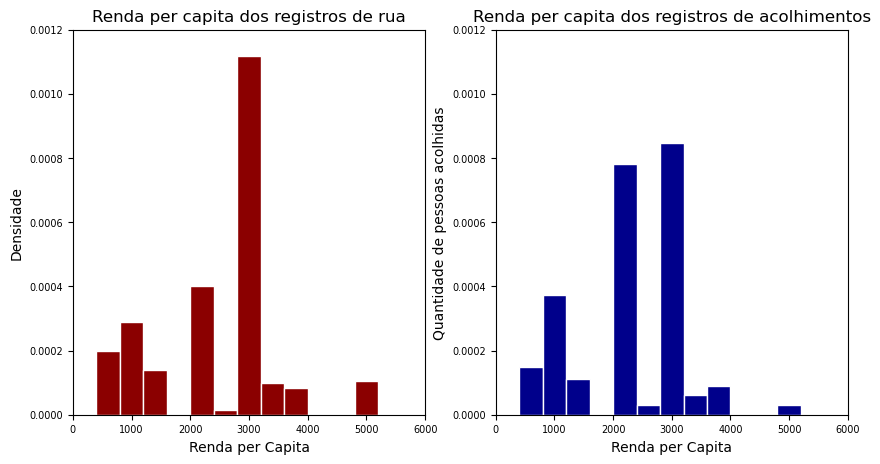

In [174]:
plt.figure(figsize=(10,5))
faixas=np.arange(0, 6500, 400)

plt.subplot(121)

plt.hist(df_quants_rua['RDPC'], edgecolor='white' , bins=faixas , color='darkred' , density=True )
plt.xlabel('Renda per Capita', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim( 0 , 6000)
plt.ylim(0, 0.0012)
plt.title('Renda per capita dos registros de rua', fontsize=12)

plt.subplot(122)

plt.hist(df_quants_acolhidos['RDPC'], edgecolor='white' , bins=faixas , color='darkBLUE' , density=True)
plt.xlabel('Renda per Capita', fontsize=10)
plt.ylabel('Quantidade de pessoas acolhidas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim( 0 , 6000)
plt.ylim(0, 0.0012)
plt.title('Renda per capita dos registros de acolhimentos', fontsize=12)

plt.show()

#### Conclusões

<p> Para valores da Faixa maiores que 3000 , há uma maior tendência de registros de pessoas em situação de rua. Porém, para valores abaixo dessa faixa, há uma tendência maior de porcentagens de Acolhimento.

#### Análise do PPOB - Proporção de vuneráveis à pobreza

In [176]:
df_quants_rua['PPOB'].value_counts(normalize = True ).to_frame()

,PPOB
4.32,0.446844
5.23,0.160668
1.67,0.042306
4.34,0.039071
4.12,0.033490
11.47,0.024413
9.35,0.023213
18.23,0.022170
1.44,0.021440
11.84,0.017893


In [177]:
df_quants_acolhidos['PPOB'].value_counts(normalize = True ).to_frame()

,PPOB
4.32,0.338200
5.23,0.312786
11.47,0.060773
4.12,0.035359
4.34,0.024704
10.83,0.019416
22.78,0.019179
8.98,0.018074
11.84,0.015470
14.73,0.015233


In [178]:
df_quants_rua['PPOB'].describe().to_frame()

,PPOB
count,19170.000000
mean,7.338735
std,5.998815
min,1.440000
25%,4.320000
50%,4.320000
75%,8.980000
max,32.440000


In [179]:
df_quants_acolhidos['PPOB'].describe().to_frame()

,PPOB
count,12670.000000
mean,7.335968
std,5.305973
min,1.440000
25%,4.320000
50%,5.230000
75%,8.980000
max,32.440000


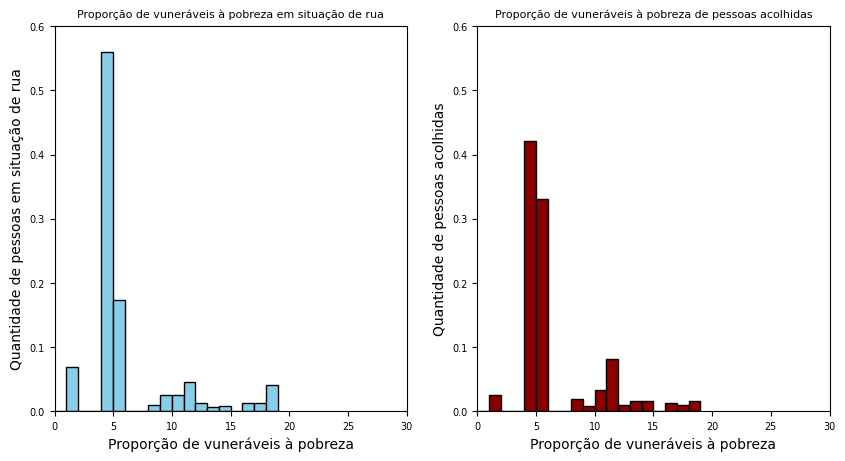

In [180]:
plt.figure(figsize=(10,5))

faixas=np.arange(0, 20, 1)

plt.subplot(121)

plt.hist(df_quants_rua['PPOB'], edgecolor='black' , bins=faixas , color='skyblue', density=True)
plt.xlabel('Proporção de vuneráveis à pobreza', fontsize=10)
plt.ylabel('Quantidade de pessoas em situação de rua', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0, 0.6)
plt.xlim(0, 30)
plt.title('Proporção de vuneráveis à pobreza em situação de rua', fontsize=8)

plt.subplot(122)

plt.hist(df_quants_acolhidos['PPOB'], edgecolor='black' , bins=faixas , color='darkred', density=True)
plt.xlabel('Proporção de vuneráveis à pobreza', fontsize=10)
plt.ylabel('Quantidade de pessoas acolhidas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0, 0.6)
plt.xlim(0, 30)
plt.title('Proporção de vuneráveis à pobreza de pessoas acolhidas', fontsize=8)

plt.show()

<p> Para valores menores que 5, há maior tendência de pessoas em situação de rua. Já em casos de Valores maiores que 5, a tendência de estarem em situação de acolhimento é ligeiramente maior. 

#### Análise do Índice de Desigualdade Social (GINI) 

In [182]:
df_quants_rua['GINI'].value_counts(normalize=True).to_frame()

,GINI
0.58,0.453625
0.56,0.189776
0.53,0.043088
0.55,0.042306
0.59,0.033490
0.48,0.032760
0.45,0.028378
0.43,0.026082
0.42,0.024517
0.52,0.023526


In [183]:
df_quants_acolhidos['GINI'].value_counts(normalize=True).to_frame()

,GINI
0.58,0.343173
0.56,0.325572
0.48,0.061168
0.43,0.035438
0.59,0.035359
0.53,0.032044
0.49,0.026440
0.52,0.023362
0.45,0.023125
0.46,0.019416


In [184]:
df_quants_rua['GINI'].describe().to_frame()

,GINI
count,19170.000000
mean,0.550449
std,0.048221
min,0.400000
25%,0.540000
50%,0.580000
75%,0.580000
max,0.680000


In [185]:
df_quants_acolhidos['GINI'].describe().to_frame()

,GINI
count,12670.000000
mean,0.548780
std,0.047796
min,0.400000
25%,0.530000
50%,0.560000
75%,0.580000
max,0.680000


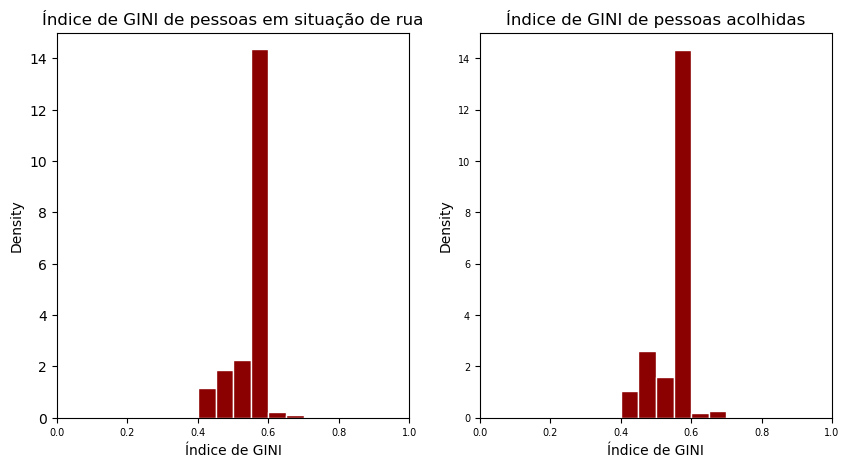

In [186]:
plt.figure(figsize=(10,5))

faixas = np.arange(0,1,0.05)

plt.subplot(121)

plt.hist(df_quants_rua['GINI'], edgecolor='white' , bins=faixas, color='darkred', density=True)
plt.xlabel('Índice de GINI', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(fontsize=7)
plt.ylim(0 , 15)
plt.xlim(0 , 1)
plt.title('Índice de GINI de pessoas em situação de rua', fontsize=12)

plt.subplot(122)

plt.hist(df_quants_acolhidos['GINI'], edgecolor='white' , color='darkred', bins=faixas, density=True)
plt.xlabel('Índice de GINI', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0 , 15)
plt.xlim(0 , 1)
plt.title('Índice de GINI de pessoas acolhidas', fontsize=12)

plt.show()

##### Conclusões 

<p> Nesse caso, percebe-se que há uma grande dificuldade de observação de diferença entre ambos os Histogramas, e, por isso, percebe-se que, o índice de Gini, pode não ser um parâmetro que identifique informações relevantes para um modelo preditivo. Por, no Geral, apresentar informações muito próximas.

#### Percentual da população de menos de 15 anos e da população de 65 anos e mais em relação à população de 15 a 64 anos (RAZDEP)

In [187]:
df_quants_rua['RAZDEP'].value_counts(normalize=True).to_frame()

,RAZDEP
32.88,0.446844
40.28,0.117580
39.05,0.043088
35.55,0.042306
38.21,0.039071
39.87,0.033490
42.31,0.024413
39.75,0.023213
40.74,0.022170
37.26,0.021440


In [188]:
df_quants_acolhidos['RAZDEP'].value_counts(normalize=True).to_frame()

,RAZDEP
32.88,0.338200
40.28,0.280742
42.31,0.060773
39.87,0.035359
39.05,0.032044
38.21,0.024704
42.78,0.019574
40.78,0.019416
41.77,0.018074
41.47,0.015470


In [189]:
df_quants_rua['RAZDEP'].describe().to_frame()

,RAZDEP
count,19170.000000
mean,36.879837
std,3.896137
min,32.880000
25%,32.880000
50%,37.260000
75%,40.280000
max,45.560000


In [190]:
df_quants_acolhidos['RAZDEP'].describe().to_frame()

,RAZDEP
count,12670.00000
mean,37.93111
std,3.79708
min,32.88000
25%,32.88000
50%,40.28000
75%,40.28000
max,45.56000


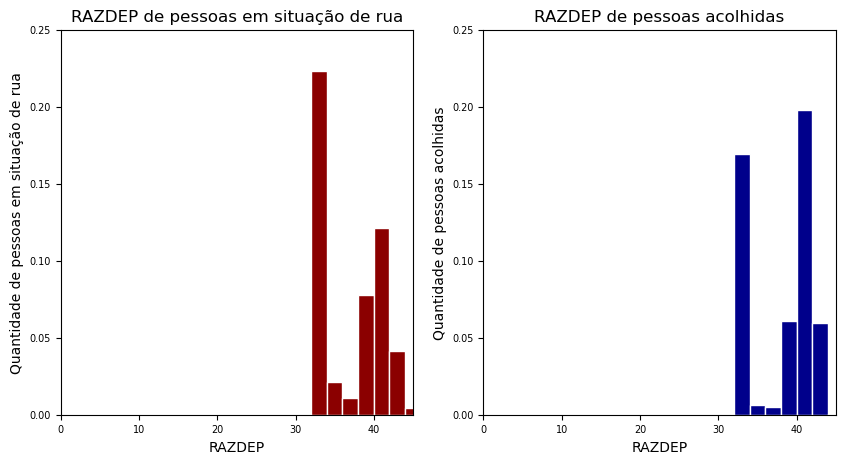

In [191]:
plt.figure(figsize=(10,5))

faixas = np.arange(0, 50, 2)

plt.subplot(121)

plt.hist(df_quants_rua['RAZDEP'], edgecolor='white' , bins=faixas , color='darkred', density=True)
plt.xlabel('RAZDEP', fontsize=10)
plt.ylabel('Quantidade de pessoas em situação de rua', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0, 0.25)
plt.xlim(0, 45)
plt.title('RAZDEP de pessoas em situação de rua', fontsize=12)

plt.subplot(122)

plt.hist(df_quants_acolhidos['RAZDEP'], edgecolor='white' , bins=faixas , color='darkblue', density=True)
plt.xlabel('RAZDEP', fontsize=10)
plt.ylabel('Quantidade de pessoas acolhidas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0, 0.25)
plt.xlim(0, 45)
plt.title('RAZDEP de pessoas acolhidas', fontsize=12)

plt.show()

<p> Para Valores maiores que 40%, há uma concentração maior de pessoas acolhidas. Já para valores menores, há uma quantidade maior de pessoas em situação de Rua.

#### 4. Aplicação de decision TREE

In [197]:
#Função para separar as variaveis 

df_encoded = pd.get_dummies(df, columns=['Sexo', 'Classificação de idade', 'Cor_Raça_Etnia','Tempo na situação','Parentes no CA'])

lista = ['Sexo_Feminino', 'Sexo_Masculino', 'Sexo_Sem identificação',
'Classificação de idade_Criança', 'Classificação de idade_Adolescente',
'Classificação de idade_Juventude', 'Classificação de idade_Adulto',
'Classificação de idade_Idoso',
'Classificação de idade_Sem informação', 'Cor_Raça_Etnia_Amarela',
'Cor_Raça_Etnia_Branca', 'Cor_Raça_Etnia_Indígena',
'Cor_Raça_Etnia_Não respondeu', 'Cor_Raça_Etnia_Parda',
'Cor_Raça_Etnia_Preta', 'Cor_Raça_Etnia_Sem identificação',
'Tempo na situação_Até 1 semana',
'Tempo na situação_Entre 1 semana e 1 mês',
'Tempo na situação_Mais de 1 ano até 2 anos',
'Tempo na situação_Mais de 1 mês até 6 meses',
'Tempo na situação_Mais de 10 anos',
'Tempo na situação_Mais de 2 anos até 5 anos',
'Tempo na situação_Mais de 5 anos até 10 anos',
'Tempo na situação_Mais de 6 meses até 1 ano',
'Tempo na situação_NR/NS', 'Parentes no CA_Não',
'Parentes no CA_Não informado', 'Parentes no CA_Sim','IDHM','I_ESCOLARIDADE','I_FREQ_PROP',
'T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP']

def splitdataset(df): 

    # Separating the target variable 
    X = df[lista] 
    Y = df['Situação de rua'] 

    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.1, random_state = 100) 
        
    return X, Y, X_train, X_test, y_train, y_test 

# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 

    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=100, min_samples_leaf=50) 

    # Performing training 
    clf_gini.fit(X_train, y_train)

    return clf_gini 
        
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 

    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 100, min_samples_leaf = 50) 

    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

# Function to make predictions 
def prediction(X_test, clf_object): 

    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
        
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
        
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
        
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
        
    print("Report : ", 
    classification_report(y_test, y_pred)) 

# Driver code 
def main(df): 

    # Building Phase 
    data = df 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
    print('-'*20, 'Test', '-'*20)           
    # Operational Phase 
    print("Results Using Gini Index:") 
        
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
        
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy)
    print('-'*20, 'Train', '-'*20)
    print("Results Using Gini Index:")
    # Prediction using gini 
    y_pred_gini = prediction(X_train, clf_gini) 
    cal_accuracy(y_train, y_pred_gini) 
        
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_train, clf_entropy) 
    cal_accuracy(y_train, y_pred_entropy)



In [198]:
# Calling main function 
if __name__=="__main__": 
    main(df_encoded)

KeyError: "['Classificação de idade_Sem informação'] not in index"

In [196]:
df_encoded = pd.get_dummies(df, columns=['Sexo', 'Classificação de idade', 'Cor_Raça_Etnia','Tempo na situação','Parentes no CA'])

lista = ['Sexo_Feminino', 'Sexo_Masculino', 'Sexo_Sem identificação',
'Classificação de idade_Criança', 'Classificação de idade_Adolescente',
'Classificação de idade_Juventude', 'Classificação de idade_Adulto',
'Classificação de idade_Idoso',
'Classificação de idade_Sem informação', 'Cor_Raça_Etnia_Amarela',
'Cor_Raça_Etnia_Branca', 'Cor_Raça_Etnia_Indígena',
'Cor_Raça_Etnia_Não respondeu', 'Cor_Raça_Etnia_Parda',
'Cor_Raça_Etnia_Preta', 'Cor_Raça_Etnia_Sem identificação',
'Tempo na situação_Até 1 semana',
'Tempo na situação_Entre 1 semana e 1 mês',
'Tempo na situação_Mais de 1 ano até 2 anos',
'Tempo na situação_Mais de 1 mês até 6 meses',
'Tempo na situação_Mais de 10 anos',
'Tempo na situação_Mais de 2 anos até 5 anos',
'Tempo na situação_Mais de 5 anos até 10 anos',
'Tempo na situação_Mais de 6 meses até 1 ano',
'Tempo na situação_NR/NS', 'Parentes no CA_Não',
'Parentes no CA_Não informado', 'Parentes no CA_Sim','IDHM','I_ESCOLARIDADE','I_FREQ_PROP',
'T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP']


X = df_encoded[lista] 
Y = df_encoded['Situação de rua'] 

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

KeyError: "['Classificação de idade_Sem informação'] not in index"

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))